# **Geospatial Visualizations Code**
## *Notebook for Geocoding the Ukraine Damage Data by Oblast*

In [35]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

### Copy Markov Chain Code for Base Data:

In [36]:
data = pd.read_csv("ukraine-damages.csv", delimiter = "|")
a = data['rayon'].isna().sum()
b = data['rayon'].value_counts()
a,b
missing_r = (8720/24269)*100
missing_r
c = data['oblast'].isna().sum()
d = data['oblast'].value_counts()
c,d
missing_o = (8/24269)*100
missing_o
data['rayon'] = data['rayon'].fillna('Missing')
data['oblast'] = data['oblast'].fillna('Unknown')
data

oblasts = data[['oblast']].copy()
oblasts.reset_index(drop=True, inplace=True)
oblasts



,oblast
0,Luhanska
1,Luhanska
2,Lvivska
3,Lvivska
4,Kyivska
...,...
24264,Khersonska
24265,Odeska
24266,Donetska
24267,Donetska


In [37]:
# TRANSITION MATRIX - OBLAST

states_o = list(oblasts["oblast"].unique())
#states_i2

# step 2: compute transition counts/matrix >> adapting code from bach.py
# REMEMBER, it's a normalized matrix

S_o = len(states_o)
#T = len(bach)
tr_counts_o = np.zeros( (S_o, S_o) )

## Compute transition counts:
for row in range(1,len(oblasts["oblast"])): # check two lines down for why we start at 1

    # Current and next tokens:
    x_tm1 = oblasts["oblast"][row-1] # previous state >> this is why we start at 1! bc we are collecting previous state.
    x_t = oblasts["oblast"][row] # current state
    # Determine transition indices:
    index_from = states_o.index(x_tm1)
    index_to = states_o.index(x_t)
    # Update transition counts:
    tr_counts_o[index_from, index_to] += 1

print('Transition Counts:\n', tr_counts_o)

# Sum the transition counts by row >> numpy axis 0 is technically rows, but visually it's columns. "rows" is what we want
sums_o = tr_counts_o.sum(axis=1, keepdims=True)
#print('State proportions: \n')

# Normalize the transition count matrix to get proportions:
tr_pr_o = np.divide(tr_counts_o, sums_o, 
                             out=np.zeros_like(tr_counts_o), 
                             where=sums_o!=0)

#print('Transition Proportions:\n')

oblast_tr_df = pd.DataFrame(np.round(tr_pr_o,2), index=states_o, columns=states_o)
print(oblast_tr_df)

Transition Counts:
 [[3.290e+02 4.000e+00 4.000e+00 7.000e+00 0.000e+00 4.800e+01 0.000e+00
  7.000e+00 1.300e+01 8.300e+01 4.000e+00 1.000e+00 4.000e+00 2.000e+00
  1.000e+00 5.000e+01 2.000e+00 2.300e+01 1.000e+00 1.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 7.100e+01 5.000e+00 0.000e+00 0.000e+00 1.400e+01 0.000e+00
  3.000e+00 0.000e+00 5.000e+00 5.000e+00 0.000e+00 3.000e+00 1.000e+00
  0.000e+00 8.000e+00 1.000e+00 1.000e+00 2.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 2.000e+00 2.000e+00 0.000e+00 2.000e+00]
 [5.000e+00 3.000e+00 4.150e+02 1.500e+01 1.000e+00 3.000e+01 5.000e+00
  1.800e+01 8.000e+00 2.300e+01 2.100e+01 2.000e+00 1.500e+01 0.000e+00
  1.000e+00 3.700e+01 1.000e+01 2.200e+01 2.000e+00 6.000e+00 1.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00]
 [2.000e+00 2.000e+00 5.000e+00 2.670e+02 2.000e+00 3.400e+01 5.000e+00
  4.000e+00 6.000e+00 4.900e+01 3.700e+01

In [38]:
# oblast projections

# transition matrix: oblast_tr_df
# oblast[0] = Luhanska

# find the index of the starting point

length_o = len(oblast_tr_df.columns)

for i in range(length_o):
    if oblast_tr_df.columns[i] == "Luhanska":
        starting_point_o = i
# initiate the projection matrix and set starting point
init_o = np.zeros(length_o) 
init_o[starting_point_o] = 1
#print(init)

time_windows = [5, 10, 25, 50, 100, 250, 500, 750, 1000, 2000]

init5_o = init_o.copy()
for i in range(5):
   #init5_o = oblast_tr_df @ init5_o
   #init5_o = init5_o @ oblast_tr_df 
   init5_o = init5_o @ tr_pr_o
#print(init2)

init10_o = init_o.copy()
for i in range(10):
   #init10_o = oblast_tr_df@init10_o
   #init10_o = init10_o@oblast_tr_df 
   init10_o = init10_o@tr_pr_o


init25_o = init_o.copy()
for i in range(25):
   #init25_o = oblast_tr_df@init25_o 
   #init25_o = init25_o@oblast_tr_df
   init25_o = init25_o@tr_pr_o  

init50_o = init_o.copy()
for i in range(50):
   #init50_o = oblast_tr_df@init50_o 
   #init50_o = init50_o@oblast_tr_df
   init50_o = init50_o@tr_pr_o

init100_o = init_o.copy()
for i in range(100):
   #init100_o = oblast_tr_df@init100_o 
   #init100_o = init100_o@oblast_tr_df
   init100_o = init100_o@tr_pr_o

init250_o = init_o.copy()
for i in range(250):
   #init250_o = oblast_tr_df@init250_o 
   #init250_o = init250_o@oblast_tr_df
   init250_o = init250_o@tr_pr_o

init500_o = init_o.copy()
for i in range(500):
   #init500_o = oblast_tr_df@init500_o 
   #init500_o = init500_o@oblast_tr_df
   init500_o = init500_o@tr_pr_o

init750_o = init_o.copy()
for i in range(750):
   #init750_o = oblast_tr_df@init750_o 
   #init750_o = init750_o@oblast_tr_df
   init750_o = init750_o@tr_pr_o

init1000_o = init_o.copy()
for i in range(1000):
   #init1000_o = oblast_tr_df@init1000_o 
   #init1000_o = init1000_o@oblast_tr_df
   init1000_o = init1000_o@tr_pr_o

init2000_o = init_o.copy()
for i in range(2000):
   #init2000_o = oblast_tr_df@init2000_o 
   #init2000_o = init2000_o@oblast_tr_df
   init2000_o = init2000_o@tr_pr_o

projections_o = pd.DataFrame({"Initial": init_o,
                            "After 5 strikes": init5_o,
                            "After 10 strikes": init10_o,
                            "After 25 strikes": init25_o,
                            "After 50 strikes": init50_o,
                            "After 100 strikes": init100_o,
                            "After 250 strikes": init250_o,
                            "After 500 strikes": init500_o,
                            "After 750 strikes": init750_o,
                            "After 1000 strikes": init1000_o,
                            "After 2000 strikes": init2000_o})
print(projections_o)

    Initial  After 5 strikes  After 10 strikes  After 25 strikes  \
0       1.0         0.073269          0.026828          0.024154   
1       0.0         0.007295          0.005538          0.005278   
2       0.0         0.022592          0.026316          0.026602   
3       0.0         0.020923          0.021391          0.021279   
4       0.0         0.000625          0.000666          0.000660   
5       0.0         0.140516          0.141188          0.139923   
6       0.0         0.007588          0.008448          0.008414   
7       0.0         0.020625          0.020671          0.020535   
8       0.0         0.060453          0.076409          0.086225   
9       0.0         0.261852          0.256923          0.251464   
10      0.0         0.053759          0.063283          0.063507   
11      0.0         0.002254          0.002210          0.002186   
12      0.0         0.028781          0.033041          0.033114   
13      0.0         0.001215          0.000933  

In [39]:
projections_o["After 2000 strikes"].sum()

np.float64(1.0000000000000018)

### Begin Geocoding & Merging Shapefile Data with Ukraine Damage Dataframe

In [40]:
# create GeoDataFrame using the polygons for Ukraine Oblasts

gdf=gpd.read_file("RayonPolygons.shp") # this file is mislabeled, it is really oblasts, not rayons
print(gdf.columns)
gdf["Oblast_City"]=gdf["NAME_1"]
len(gdf["Oblast_City"])



Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


28

### Reconcile Naming Differences:

The Ukraine Damages dataset used the English spelling of many Oblast and Rayon names, so it did not align perfectly with the shapefile naming conventions. I created a quick key in excel and saved it as a CSV that matched the dataframe oblast name spellings with the corresponding spellings in the shapefile table. That table was then merged onto both the oblast dataframe as well as the geopandas file so that a merge of the transition matrix and the shapefile would execute cleanly. The key table is called "oblast_name_map".

In [41]:
oblast_name_map=pd.read_csv("UkraineOblastRemap.csv")
oblast_name_map=oblast_name_map[["GeoName", "DamageName"]]
oblast_name_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GeoName     27 non-null     object
 1   DamageName  27 non-null     object
dtypes: object(2)
memory usage: 564.0+ bytes


In [42]:
projections_o.columns

Index(['Initial', 'After 5 strikes', 'After 10 strikes', 'After 25 strikes',
       'After 50 strikes', 'After 100 strikes', 'After 250 strikes',
       'After 500 strikes', 'After 750 strikes', 'After 1000 strikes',
       'After 2000 strikes'],
      dtype='object')

In [43]:
projections_o["oblast_names"]=states_o
projections_o=projections_o.set_index("oblast_names")
projections_o

,Initial,After 5 strikes,After 10 strikes,After 25 strikes,After 50 strikes,After 100 strikes,After 250 strikes,After 500 strikes,After 750 strikes,After 1000 strikes,After 2000 strikes
oblast_names,,,,,,,,,,,
Luhanska,1.0,0.073269,0.026828,0.024154,0.024139,0.024139,0.024139,0.024139,0.024139,0.024139,0.024139
Lvivska,0.0,0.007295,0.005538,0.005278,0.005273,0.005273,0.005273,0.005273,0.005273,0.005273,0.005273
Kyivska,0.0,0.022592,0.026316,0.026602,0.026578,0.026578,0.026578,0.026578,0.026578,0.026578,0.026578
Chernihivska,0.0,0.020923,0.021391,0.021279,0.021262,0.021262,0.021262,0.021262,0.021262,0.021262,0.021262
Volynska,0.0,0.000625,0.000666,0.000660,0.000659,0.000659,0.000659,0.000659,0.000659,0.000659,0.000659
Kharkivska,0.0,0.140516,0.141188,0.139923,0.139811,0.139809,0.139809,0.139809,0.139809,0.139809,0.139809
Zhytomyrska,0.0,0.007588,0.008448,0.008414,0.008407,0.008407,0.008407,0.008407,0.008407,0.008407,0.008407
Kyiv,0.0,0.020625,0.020671,0.020535,0.020519,0.020519,0.020519,0.020519,0.020519,0.020519,0.020519
Mykolaivska,0.0,0.060453,0.076409,0.086225,0.086932,0.086940,0.086940,0.086940,0.086940,0.086940,0.086940


Before merging the transition matrix and the shapefile, I had to ensure they were both in the correct shape for the matrix calculations.

In [44]:
projections_long=projections_o.reset_index().melt(
    id_vars="oblast_names",
    var_name="timestep",
    value_name="prob"
).rename(columns={"oblast_names":"oblast"})
projections_long

,oblast,timestep,prob
0,Luhanska,Initial,1.000000
1,Lvivska,Initial,0.000000
2,Kyivska,Initial,0.000000
3,Chernihivska,Initial,0.000000
4,Volynska,Initial,0.000000
...,...,...,...
303,Chernivetska,After 2000 strikes,0.000288
304,Ivano-Frankivska,After 2000 strikes,0.000783
305,Poltavska,After 2000 strikes,0.006098
306,Sevastopol,After 2000 strikes,0.000206


In [45]:
oblast_name_map

,GeoName,DamageName
0,Dnipropetrovs'k,Dnipropetrovska
1,Donets'k,Donetska
2,Ivano-Frankivs'k,Ivano-Frankivska
3,Khmel'nyts'kyy,Khmelnytska
4,Luhans'k,Luhanska
5,L'viv,Lvivska
6,Sevastopol',Sevastopol
7,Ternopil,Ternopilska
8,Cherkasy,Cherkaska
9,Chernihiv,Chernihivska


In [46]:
gdf['Oblast_City'] = gdf['Oblast_City'].str.strip().str.lower()
oblast_name_map['GeoName'] = oblast_name_map['GeoName'].str.strip().str.lower()


In [47]:
gdf_m=pd.merge(gdf, oblast_name_map, how="left", left_on="Oblast_City", right_on="GeoName")

In [48]:
gdf_m=gdf_m.rename(columns={"DamageName":"oblast"})
gdf_m.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GID_1        28 non-null     object  
 1   GID_0        28 non-null     object  
 2   COUNTRY      28 non-null     object  
 3   NAME_1       28 non-null     object  
 4   VARNAME_1    28 non-null     object  
 5   NL_NAME_1    28 non-null     object  
 6   TYPE_1       28 non-null     object  
 7   ENGTYPE_1    28 non-null     object  
 8   CC_1         28 non-null     object  
 9   HASC_1       28 non-null     object  
 10  ISO_1        28 non-null     object  
 11  geometry     28 non-null     geometry
 12  Oblast_City  28 non-null     object  
 13  GeoName      26 non-null     object  
 14  oblast       26 non-null     object  
dtypes: geometry(1), object(14)
memory usage: 3.4+ KB


## Merging the shapefile and the transition matrix:

In [49]:
merged=gdf_m.merge(projections_long, on="oblast")

In [50]:
# Merge the oblasts dataframe with the remapped 
# names so they align with those in the shapefile

merged_oblasts=pd.merge(oblasts, oblast_name_map, how="left", left_on="oblast", right_on="DamageName")
merged_oblasts.head()

,oblast,GeoName,DamageName
0,Luhanska,luhans'k,Luhanska
1,Luhanska,luhans'k,Luhanska
2,Lvivska,l'viv,Lvivska
3,Lvivska,l'viv,Lvivska
4,Kyivska,kiev city,Kyivska


In [51]:
gdf=gdf.rename(columns={"NAME_1":"Oblast_City"})
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GID_1        28 non-null     object  
 1   GID_0        28 non-null     object  
 2   COUNTRY      28 non-null     object  
 3   Oblast_City  28 non-null     object  
 4   VARNAME_1    28 non-null     object  
 5   NL_NAME_1    28 non-null     object  
 6   TYPE_1       28 non-null     object  
 7   ENGTYPE_1    28 non-null     object  
 8   CC_1         28 non-null     object  
 9   HASC_1       28 non-null     object  
 10  ISO_1        28 non-null     object  
 11  geometry     28 non-null     geometry
 12  Oblast_City  28 non-null     object  
dtypes: geometry(1), object(12)
memory usage: 3.0+ KB


## **The "merged" file:**

The result is a table that has a row for every oblast-timestep combination. This is a shapefile which means that each probability and timestep is associated with a geospatial polygon that can be plotted onto a map of Ukraine and better visualize where strikes are likely to occur at a given timestep.

In [52]:
merged

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,Oblast_City,GeoName,oblast,timestep,prob
0,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,Initial,0.000000
1,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,After 5 strikes,0.004953
2,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,After 10 strikes,0.005462
3,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,After 25 strikes,0.005483
4,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,After 50 strikes,0.005480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,UKR.27_1,UKR,Ukraine,Zhytomyr,Zhitomir|Jitomir|Shitomir|Zhitom,Житомирська,Oblast',Region,NA,UA.ZT,NA,"POLYGON ((29.48109 49.75942, 29.47269 49.74746...",zhytomyr,zhytomyr,Zhytomyrska,After 250 strikes,0.008407
282,UKR.27_1,UKR,Ukraine,Zhytomyr,Zhitomir|Jitomir|Shitomir|Zhitom,Житомирська,Oblast',Region,NA,UA.ZT,NA,"POLYGON ((29.48109 49.75942, 29.47269 49.74746...",zhytomyr,zhytomyr,Zhytomyrska,After 500 strikes,0.008407
283,UKR.27_1,UKR,Ukraine,Zhytomyr,Zhitomir|Jitomir|Shitomir|Zhitom,Житомирська,Oblast',Region,NA,UA.ZT,NA,"POLYGON ((29.48109 49.75942, 29.47269 49.74746...",zhytomyr,zhytomyr,Zhytomyrska,After 750 strikes,0.008407
284,UKR.27_1,UKR,Ukraine,Zhytomyr,Zhitomir|Jitomir|Shitomir|Zhitom,Житомирська,Oblast',Region,NA,UA.ZT,NA,"POLYGON ((29.48109 49.75942, 29.47269 49.74746...",zhytomyr,zhytomyr,Zhytomyrska,After 1000 strikes,0.008407


In [53]:
timestep_dict={'After 10 strikes':10,
 'After 100 strikes':100,
 'After 1000 strikes':1000,
 'After 2000 strikes':2000,
 'After 25 strikes':25,
 'After 250 strikes':250,
 'After 5 strikes':5,
 'After 50 strikes':50,
 'After 500 strikes':500,
 'After 750 strikes':750,
 'Initial':0}
merged["timestep"]=merged["timestep"].replace(timestep_dict)
merged.head()

/tmp/ipykernel_25657/2024301051.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged["timestep"]=merged["timestep"].replace(timestep_dict)


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,Oblast_City,GeoName,oblast,timestep,prob
0,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,0,0.000000
1,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,5,0.004953
2,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,10,0.005462
3,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,25,0.005483
4,UKR.1_1,UKR,Ukraine,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya,Черкаська,Oblast',Region,NA,UA.CK,NA,"POLYGON ((30.94024 48.75866, 30.92243 48.75286...",cherkasy,cherkasy,Cherkaska,50,0.005480


## Graph Visuals Plotted:

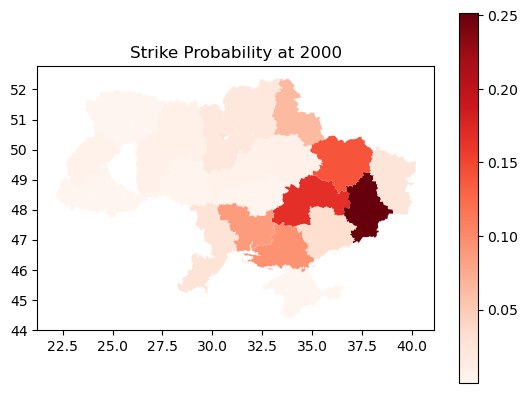

In [54]:
timestep_to_plot = 2000 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()


In [55]:
print("Merged GeoDataFrame shape:", merged.shape)
if merged.empty:
    print("Warning: merged GeoDataFrame is empty. Check oblast names for mismatches!")

Merged GeoDataFrame shape: (286, 17)


In [56]:
merged.to_file("Merged_GeoData_StrikePro.shp")

/tmp/ipykernel_25657/939238601.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file("Merged_GeoData_StrikePro.shp")
/home/eglha/miniconda3/envs/ds6001/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Oblast_City' to 'Oblast_Cit'
  ogr_write(


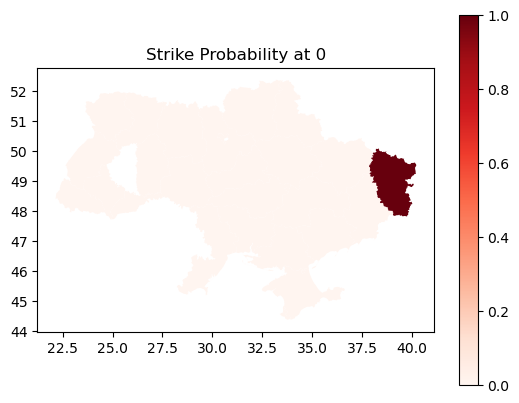

In [57]:
timestep_to_plot = 0 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

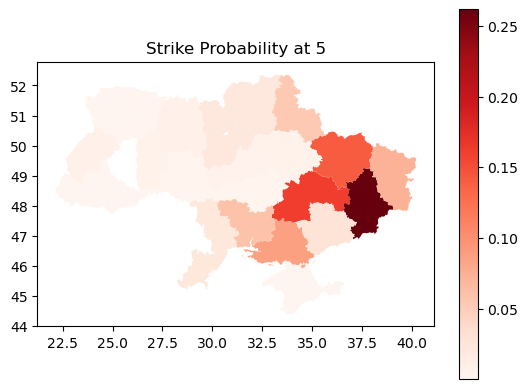

In [58]:
timestep_to_plot = 5 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

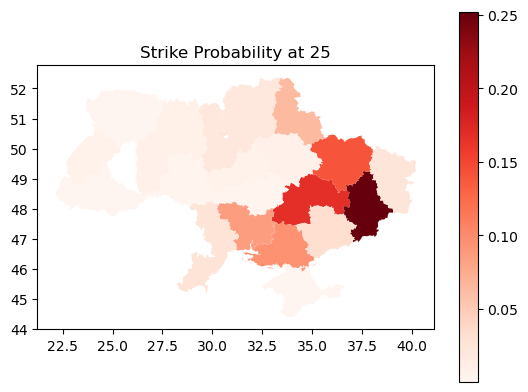

In [59]:
timestep_to_plot = 25 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

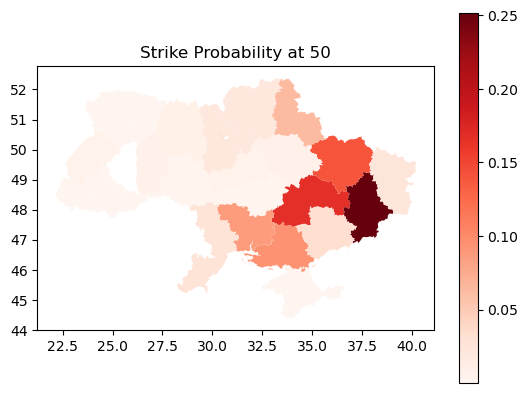

In [60]:
timestep_to_plot = 50 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

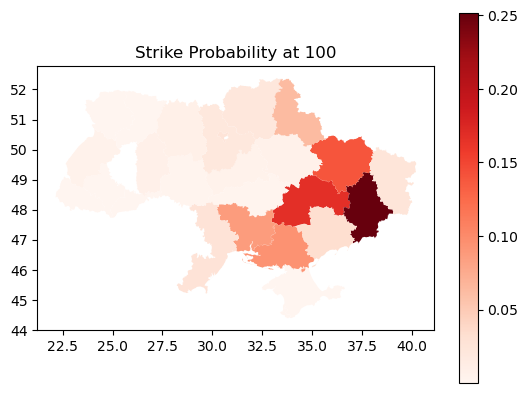

In [61]:
timestep_to_plot = 100 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

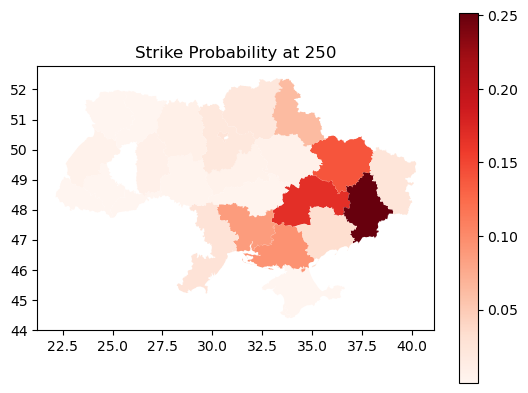

In [62]:
timestep_to_plot = 250 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

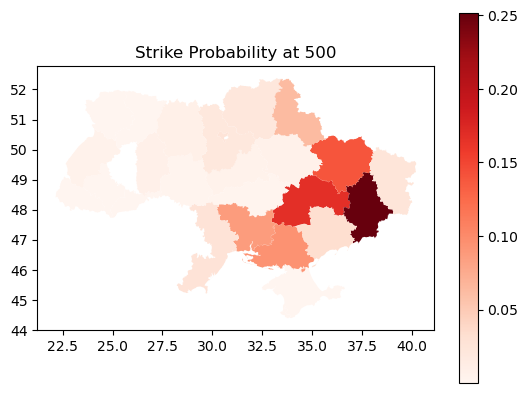

In [63]:
timestep_to_plot = 500 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

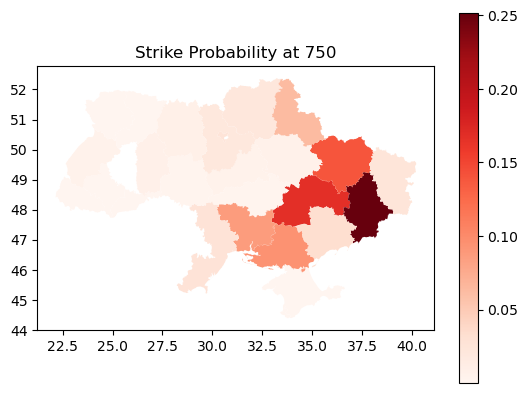

In [64]:
timestep_to_plot = 750 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

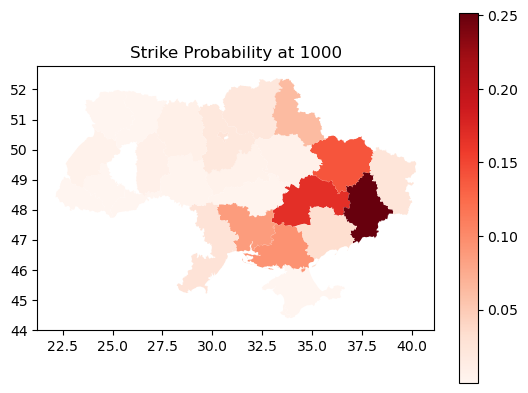

In [65]:
timestep_to_plot = 1000 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()

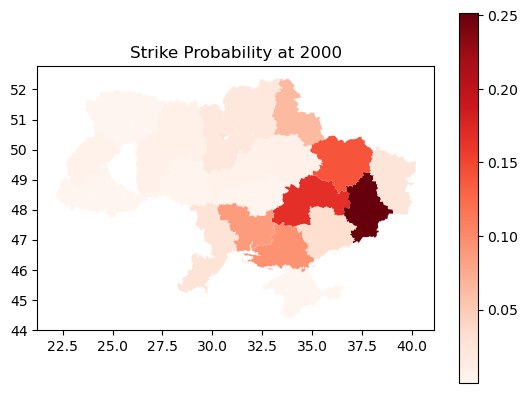

In [66]:
timestep_to_plot = 2000 
subset = merged[merged["timestep"] == timestep_to_plot]

subset.plot(column="prob", cmap="Reds", legend=True)
plt.title(f"Strike Probability at {timestep_to_plot}")
plt.show()